## MAC 安裝 opencv3
- brew tap homebrew/science
- brew install opencv3

## Windows 安裝 opencv3
- https://www.lfd.uci.edu/~gohlke/pythonlibs/

In [ ]:
! pip install opencv_python-3.4.3-cp36-cp36m-win_amd64.whl

## 擷取臉部圖片

In [55]:
import os
os.listdir('idol1')[0:8]

['ANd9GcTv15_WmbRzlPJ1uEwLonjCeiioQO1xFJa-X7RUvpm1pY2izE2l2Q.jpg',
 'ANd9GcQrciPd8qs2zT1vzYI0d_lxmPoOrXJh6jSKy2uZnT12ZY9S9Rb2ZA.jpg',
 'ANd9GcSYOOWjnSsoGQrnLN1J7H0Ve5JCuX0T0Oj7OguarsVp-MP6oxEQwQ.jpg',
 'ANd9GcSUn8VrM52OBFEao9Xw2uJRH4Mv1AEAG6x6T2rd3R0hooPRmiynqQ.jpg',
 'ANd9GcRJoHc5NPz-QCj6hFWuo7f5cqVc0RKc1y-ICXJHVI2iV7iIMnjVzQ.jpg',
 'ANd9GcT7W3MxN2G3y-8utZy_B0LedbUKMuKF4niqk3Jj3EyqDQ2eY3QT2w.jpg',
 'ANd9GcRleQX32qSMriyGoh6Ehhehk6dpbdO1XhiBYVJD1jKgABUbZ8n7kA.jpg',
 'ANd9GcQXS8Se-e0QN9vFgyP2tYR0bDmCeOxVfNK1CTWO9GssMriKbrFM.jpg']

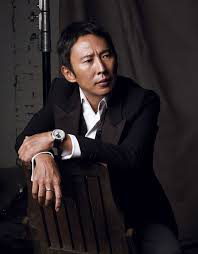

In [58]:
from PIL import Image
img = Image.open('idol1/ANd9GcQXS8Se-e0QN9vFgyP2tYR0bDmCeOxVfNK1CTWO9GssMriKbrFM.jpg')
img

In [59]:
import cv2 as cv
imgary = cv.imread('idol1/ANd9GcQXS8Se-e0QN9vFgyP2tYR0bDmCeOxVfNK1CTWO9GssMriKbrFM.jpg')

In [60]:
imgary

array([[[38, 37, 39],
        [38, 37, 39],
        [38, 37, 39],
        ...,
        [31, 29, 35],
        [31, 29, 35],
        [31, 29, 35]],

       [[38, 37, 39],
        [38, 37, 39],
        [38, 37, 39],
        ...,
        [31, 29, 35],
        [31, 29, 35],
        [31, 29, 35]],

       [[38, 37, 39],
        [38, 37, 39],
        [38, 37, 39],
        ...,
        [32, 30, 36],
        [32, 30, 36],
        [32, 30, 36]],

       ...,

       [[ 9,  1,  2],
        [ 9,  1,  2],
        [ 9,  1,  2],
        ...,
        [17,  9, 10],
        [17,  9, 10],
        [17,  9, 10]],

       [[ 9,  1,  2],
        [ 9,  1,  2],
        [ 9,  1,  2],
        ...,
        [17,  9, 10],
        [17,  9, 10],
        [17,  9, 10]],

       [[ 9,  1,  2],
        [ 9,  1,  2],
        [ 9,  1,  2],
        ...,
        [18, 10, 11],
        [18, 10, 11],
        [18, 10, 11]]], dtype=uint8)

In [48]:
imgary.shape

(254, 198, 3)

In [49]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(imgary, 1.3, 5)

In [61]:
faces

array([[67, 35, 58, 58]], dtype=int32)

In [50]:
x,y,w,h = faces[0]

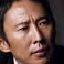

In [62]:
crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
crpim

In [65]:
import os
os.mkdir('idol1_face/')

In [66]:
import os
srcpath = 'idol1/' 
dstpath = 'idol1_face/'
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
for fname in os.listdir(srcpath):
    img = Image.open(srcpath + fname)
    imgary = cv.imread(srcpath + fname)
    faces = face_cascade.detectMultiScale(imgary, 1.3, 5)
    if len(faces) == 1:
        x,y,w,h = faces[0]
        crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
        crpim.save(dstpath + fname)
    #print(srcpath + fname)

In [67]:
os.listdir(dstpath)[0:5]

['ANd9GcQrciPd8qs2zT1vzYI0d_lxmPoOrXJh6jSKy2uZnT12ZY9S9Rb2ZA.jpg',
 'ANd9GcT7W3MxN2G3y-8utZy_B0LedbUKMuKF4niqk3Jj3EyqDQ2eY3QT2w.jpg',
 'ANd9GcQXS8Se-e0QN9vFgyP2tYR0bDmCeOxVfNK1CTWO9GssMriKbrFM.jpg',
 'ANd9GcRJ3_QKBLT62IPuy60UnUjKCP-ih12eqQRQp2Qf8M15ahx1Is_0lA.jpg',
 'ANd9GcQDzpoX1wdJAVyfgN0h93k7uRqmMKUc2AVbVRmJanPKNddfSm6l.jpg']

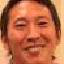

In [68]:
Image.open('idol1_face/ANd9GcQrciPd8qs2zT1vzYI0d_lxmPoOrXJh6jSKy2uZnT12ZY9S9Rb2ZA.jpg')